## Data mining questions

1- Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

- because **linear rigression** is mainly used to **predict continuous values** wherase **classification** is about **predicting discrete values**, also **linear regression**  is senstive to **outliers**, in other hand **logistic regression** is mainly used for **classification** task and 
A **perceptron** is an algorithm for **supervised learning** and it's used as binary classifier like **logistic regression** but the main difference that **perceptron** using **step activation function**.
both **logistic regression** and **preceptron** are better than **linear regression** in **classification** task.

---


2- What's a decision tree and how it is different to a logistic regression model?

- A **decision tree** is a sort of supervised machine learning that categorizes or predicts outcomes based on the answers to a previous set of questions.
, and consists of 
 - **Root node**: The base of the decision tree.
 - **Splitting**: The process of dividing a node into multiple sub-nodes.
 - **Branch**: A subsection of the decision tree consisting of multiple nodes.

 - **Decision node**: When a sub-node is further split into additional sub-nodes.
 - **Leaf node**: When a sub-node does not further split into additional sub-nodes; represents possible outcomes. 

 The difference between **decision tree** and **logistic regression** is that **logistic regression** assumes that the data is **linearly separable** in space, whereas **decision tree** is a **non-linear** classifier; it doesn't not require data to be linearly separable, another difference that categorical data works well with **decision tree**, while **continuous data** work well with **logistic regression**.

---


3- What's the difference between grid search and random search?

both are mainly used to tune hyperparameters of any model, but the difference between both, is that the **grid search** for the best combination from all hyperparameter combinations, every combination of hyperparameter values is tried which can be very inefficient and it will take a long time to execute, in other hand **random search** sets up a grid of hyperparameter values and searches for random combinations to train the model and score, it will not find the best hyperparameter as **grid search** do, but it's faster than **grid search**.

---

4- What's the difference between bayesian search and random search?

**Bayesian search** is a sequential model-based optimization algorithm that uses the results from the previous iteration to decide the next hyperparameter value while **randoms search** sets up a grid of hyperparameter values and selects random combinations to train the model and score (provide a statistical distribution for each hyperparameter from which values are sampled)
**bayesian search** is performing better than random search in finding best hyperparameters and it's faster than **grid search**.

## problem formulation
</br>

### problem definition

our problem here is that we want to build a machine learning model to predict the probability (0-1, float) **(output)** that the dating session will lead to a successful match. based on participants' information such as *gender*, *income* *level*, *main home*, *personality characteristics* **(inputs)**, etc

**(191 features)** for both training set **(5909 observations)** and test set **(2469 observations)** as inputs

**(1 feature)** for train set **(5909 observations)** as output.

#### **Note:- you'll find the dataset at https://www.kaggle.com/competitions/cisc-873-dm-f22-a1**

</br>

### Challenges

- The first challenge here is that our dataset has a lot of null values in columns and rows, so it requires a lot of cleaning and preprocessing.

- The second challenge here is that our dataset has a lot of redundant, highly correlated features, so we need to do some feature engineering processes in order to improve the accuracy.

- The third challenge here is that the is an imbalanced dataset a lot 0's and less of 1's, I did oversampling can be defined as adding more copies to the minority class. oversampling can be a good choice when you don’t have a ton of data to work with.



REF: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

</br>


### Data mining function

- **classification & prediction**

</br>

### Model impact

- It will act as a recommender to get people to meet their suitable partners in speed dating events.

</br>

### The ideal solution

- Using a **gradient boosting classifier** with **random search** to search for the best hyperparameters combinations to get better ROC-AUC result (88.184%) late submission, it takes a reasonable amount of time in searching, but you need to build a suitable search space based on your resources and you can improve the ROC-AUC result by increasing hyperparameters search space.


## Experimental protocol

- **Data exploration**
</br>

- **Data preprocessing** 
- - deal with some known columns (replace null values- convert datatypes of these columns- drop some unimportant columns- convert one column to OHE columns)
- - building a pipeline which will do some preprocessing on the rest of the features.
- -  applying knn imputer to impute missing values from these columns that I didn't preprocess manually.
- - applying standard scaling on all columns since after I finished all manual preprocessing all columns in the dataset are numeric features.

</br>

- **Building models** (Build another 3 pipelines and pass preprocessing pipeline to each one of them.)

- **creating search spaces** (grid, bayesian and random)
- **Start training each model many times with many hyperparameters from search space and choose the best**
- **Start predicting the test data**

## required packages

In [3]:
import sys

#to show dataframe
import pandas as pd

import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
#sklearn pipline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
import time
!pip install scikit-optimize

#three types of search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import joblib
# Some warnings tend to pop up during grid search

#to handel implanced dataset
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')
#pd.options.display.max_rows = 999
pd.set_option('display.max_rows',500)
np.set_printoptions(threshold=sys.maxsize)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## load the train.csv and test.csv and merge them into one dataset

I did that because anything that I'll do in training dataset should also applied on the test dataset, instead of doing same operations two times for both dataset. 

In [4]:
#train dataset
df = pd.read_csv('train.csv',index_col='id')
#test dataset
df2 = pd.read_csv('test.csv',index_col='id')
#merge together
data = pd.concat([df,df2],axis = 0)
print(data.shape[0], 'observations and', data.shape[1], 'features')
df.shape

6904 observations and 191 features


(4435, 191)

## Data Exploration

In [5]:
#print first ten observations
data.head(10)

gender  idg  condtn  wave  round  position  positin1  order  partner  \
id                                                                             
2583.0       0    3       2    14     18         2       2.0     14       12   
6830.0       1   14       1     3     10         2       NaN      8        8   
4840.0       1   14       1    13     10         8       8.0     10       10   
5508.0       1   38       2     9     20        18      13.0      6        7   
4828.0       1   24       2    14     20         6       6.0     20       17   
7126.0       0    3       2    14     18         2       2.0     18        8   
3774.0       1    6       2     9     20        17      16.0      2       11   
4303.0       0    7       2     4     18        15       NaN      1        1   
3859.0       0   29       2    11     21        10      10.0      3        6   
7049.0       0    7       2    11     21        13      13.0     15       11   

          pid  ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  \
id             ...                                                        
2583.0  372.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
6830.0   63.0  ...      6.0      8.0       8.0     7.0     8.0      NaN   
4840.0  331.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
5508.0  200.0  ...      8.0      9.0       8.0     8.0     6.0      NaN   
4828.0  357.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
7126.0  368.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
3774.0  204.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
4303.0   94.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
3859.0  278.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
7049.0  283.0  ...      NaN      NaN       NaN     NaN     NaN      NaN   

        sinc5_3  intel5_3  fun5_3  amb5_3  
id                                         
2583.0      NaN       NaN     NaN     NaN  
6830.0      NaN       NaN     NaN     NaN  
4840.0      NaN       NaN     NaN     NaN  
5508.0      NaN       NaN     NaN     NaN  
4828.0      NaN       NaN     NaN     NaN  
7126.0      NaN       NaN     NaN     NaN  
3774.0      NaN       NaN     NaN     NaN  
4303.0      NaN       NaN     NaN     NaN  
3859.0      NaN       NaN     NaN     NaN  
7049.0      NaN       NaN     NaN     NaN  

[10 rows x 191 columns]

Of course, before I decide what's preprocessing process I'll do on the data, first, I should know what's the nature of the data.

In [6]:
data.dtypes.value_counts()

float64    175
int64        8
object       8
dtype: int64

Who are object columns here?

In [7]:
data[data.select_dtypes(['object']).columns].columns

Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')

I will drop field, undergrad, zipcode, idg, zipcode and I will convert tuition

In [8]:
data.groupby('pid').mean().gender.value_counts()

0.0    277
1.0    274
Name: gender, dtype: int64

Ratio of binary target to each others

1.0    0.164149
0.0    0.835851
Name: match, dtype: float64


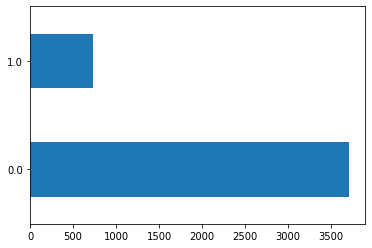

In [9]:
print(data['match'].value_counts(normalize=True).sort_values())
data['match'].value_counts().plot(kind='barh')

In [10]:
#number of null value in each feature
data.isnull().sum().sort_values()

gender         0
idg            0
condtn         0
wave           0
round          0
position       0
order          0
partner        0
samerace       1
pid            6
field         51
race          51
race_o        57
attr1_1       64
from          64
attr2_1       64
goal          64
sinc1_1       64
go_out        64
sports        64
tvsports      64
exercise      64
dining        64
museums       64
art           64
hiking        64
gaming        64
clubbing      64
reading       64
tv            64
imprelig      64
movies        64
concerts      64
music         64
shopping      64
yoga          64
theater       64
intel2_1      64
sinc2_1       64
intel1_1      64
fun2_1        64
imprace       64
field_cd      66
pf_o_att      67
pf_o_sin      67
pf_o_int      67
shar2_1       72
fun1_1        72
amb2_1        72
career        73
pf_o_fun      75
age           75
exphappy      79
date          79
amb1_1        81
pf_o_amb      81
age_o         83
intel3_1      86
amb3_1        

In [11]:
#each age value count value
data["age"].value_counts()

27.0    857
23.0    735
26.0    727
24.0    705
25.0    681
28.0    612
22.0    532
29.0    490
30.0    488
21.0    234
32.0    176
33.0    138
34.0    126
31.0    111
35.0     56
20.0     45
36.0     35
19.0     19
39.0     16
42.0     15
38.0     14
18.0      7
55.0      5
37.0      5
Name: age, dtype: int64

In [12]:
#print the mean of participants' ages and their parteners 
print(round(data["age"].mean(),1))
print(round(data["age_o"].mean(),1))
print("They are the same")

26.4
26.4
They are the same


In [13]:
personalty_features = data[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
personalty_features = personalty_features.mean().sort_values()
personalty_features

amb1_1      10.725408
shar1_1     11.852024
sinc1_1     17.354991
fun1_1      17.462335
intel1_1    20.339012
attr1_1     22.437376
dtype: float64

In [14]:
corr = data.corr()

corr.style.background_gradient(cmap="Spectral")

## Data preprocessing

**'participants' ages'*  and **'partners' ages'** features

In [15]:
#fill null values in age column with mean
data["age"] = data["age"].fillna(round(data["age"].mean(),1))
#fill null values in partener age column with mean
data["age_o"] = data["age_o"].fillna(round(data["age_o"].mean(),1))
#generate a new feature by subtracting the age feature from its participant feature
data['age_difference'] = data['age'] - data['age_o']

if not data['age_o'].isnull().values.any() and not data['age'].isnull().values.any():
    print("There's no null values in participants ages and partners ages features now")

There's no null values in participants ages and partners ages features now


**'participants' incomes'** features

In [16]:
#fill null values in income feature with 0
data.income =data.income.fillna("0.00")
data.income = data.income.str.replace((".00"), (""))
data.income = data.income.str.replace((","), (""))
if not data['income'].isnull().values.any() and not data['income'].isnull().values.any():
    print("There's no null values in participants incomes feature now")

There's no null values in participants incomes feature now


**'participants' minimum sat score'** feature

In [17]:
#replace some unimortant string with nothing
data.mn_sat = data.mn_sat.str.replace((".00"), (""))
data.mn_sat = data.mn_sat.str.replace((","), (""))
#convert it to float now to fill its null values with its mean
data[["mn_sat"]] = data[["mn_sat"]].astype(float)
data.mn_sat = data.mn_sat.fillna(data.mn_sat.mean())
data["mn_sat"].value_counts()
if not data['mn_sat'].isnull().values.any() and not data['mn_sat'].isnull().values.any():
    print("There's no null values in participants minimum sat score feature now")

There's no null values in participants minimum sat score feature now


**'participants' tuition'** feature

In [18]:
data.tuition = data.tuition.str.replace((".00"), (""))
data.tuition = data.tuition.str.replace((","), (""))
#convert it to float now to fill its null values with its median
data.tuition = data.tuition.astype(float)

data.tuition = data.tuition.fillna(data.tuition.median())
data["tuition"].value_counts()

if not data['tuition'].isnull().values.any() and not data['tuition'].isnull().values.any():
    print("There's no null values in participants tuition feature now")

There's no null values in participants tuition feature now


fill null values for (*'race'*, *'goal'*, *'field_cd'*, *'career_cd'*) features

In [19]:
#6 in race feature means other, so I filled null values in this column with 6
data.race = data.race.fillna(6)
#same with race column
data.race_o = data.race.fillna(6)
#6 in goal feature means other, so I filled null values in this column with 6
data['goal'] = data['goal'].fillna(6)
#18 in field coded feature means other, so I filled null values in this column with 18
data['field_cd'] = data['field_cd'].fillna(18)
#18 in career coded feature means other, so I filled null values in this column with 15.0
data['career_c'] = data['career_c'].fillna(15.0)

### clear 'from' column by replacing redundant and irrelevant values with useful and meaning full value manually.

ex 1: 

* **'nyc'**, **'I'm from new york'**, **'Queens'**, **'Manhattan'** they all in **'New York'** state, so I replaced them with **'New York'** (most frequant value)


ex 2:
* **'Los Angeles'**, **'Santa Barbara'**, **'Torrance, CA'** they all in **'California'** state, so I replaced them with **'California'**


Also I replaced null values in this column with **'New York'** (most frequant value)

In [20]:
data[['from']] = data[['from']].replace(dict.fromkeys(['NY','nyc','Bronx Science','Queens','Vestal','Manhattan','Staten Island','Hastings-on-Hudson, NY','Long Island','Pougkeepsie NY','Westchester, new York','Upstate New York','Rochester, NY','Long Island, NY','Saratoga, NY','I am from NYC','Brooklyn, NY','Brooklyn','brooklyn ny','brooklyn, ny','Buffalo, NY', 'NYC','New York City','NYC (Staten Island)','new york city','Westchester County, N.Y.','Westchester, NY','Great Neck, NY','New York, NY'],'New York'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Los Angeles, CA','Berkeley','Palo Alto, California','Los Angeles','LOS ANGELES','Palm Springs, California','Torrance, CA','Santa Barbara, California','lOS aNGELES','SF Bay Area, CA','Berkeley, CA','San Diego','los angeles','Northern California','Southern California','San Francisco/LA','94115', 'San Diego, CA', 'San Francisco', 'California (West Coast)','Palo Alto, CA', 'San Francisco, CA', 'San Francisco Bay Area'],'California'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Washington, D.C.','Wash DC (4 yrs)','WASHINGTON, D.C.','Washington DC','Washington, DC','Washington State','Washington DC Metro Region', 'Seattle'],'Washington'))
data[['from']] = data[['from']].replace(dict.fromkeys(['NJ','South Orange, New Jersey','Cherry Hill, NJ','Northern New Jersey'],'New Jersey'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Boston','Boston, MA','Boston, Ma','Lexington, MA','Brandeis University','boston, ma','Cambridge, MA','Woburn, MA','Cambridge, Massachusetts'],'Massachusetts'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Philadelphia','New Hope, PA','Erie, PA','Philadelphia, PA','State College, PA','Pittsburgh, PA','PA'],'Pennsylvania'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Cincinnati, Ohio','Cincinnati, OH'],'Ohio'))
data[['from']] = data[['from']].replace(dict.fromkeys(['London, England','England','London, UK'],'UK'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Austin, TX','Dallas, Texas','Houston'],'Texas'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Minneapolis','Minneapolis, MN'],'Minnesota'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Milan, Italy','Genova, Italy','Milano, Italy','Milan - Italy'],'Italy'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Boulder, Colorado'],'Colorado'))
data[['from']] = data[['from']].replace(dict.fromkeys(['ottawa, canada','Ottawa, Canada','Toronto, Canada','Toronto'],'Canada'))
data[['from']] = data[['from']].replace(dict.fromkeys(['P. R. China','BEIJING, CHINA','Shanghai, China'],'China'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Silver Spring, MD','MD','Baltimore'],'Maryland'))
data[['from']] = data[['from']].replace(dict.fromkeys(['nashville, TN','Memphis, TN','TN'],'Tennessee'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Kansas City, Missouri','Kansas','Ann Arbor, MI','St. Louis, MO'],'Missouri'))
data[['from']] = data[['from']].replace(dict.fromkeys(['Bogota, Colombia','Colombia, South America'],'Colombia'))
data[['from']] = data[['from']].replace(dict.fromkeys(['New Delhi, India','Bombay, India'],'India'))


data[['from']] = data[['from']].replace(['Miami'],['Florida'])
data[['from']] = data[['from']].replace(['HKG'],['Hong kong'])
data[['from']] = data[['from']].replace(['Paris'],['France'])
data[['from']] = data[['from']].replace(['Milwaukee, Wisconsin'],['Wisconsin'])
data[['from']] = data[['from']].replace(['Tokyo, Japan'],['Japan'])
data[['from']] = data[['from']].replace(['Asia, Singapore'],['Singapore'])
data[['from']] = data[['from']].replace(['sofia, bg'],['Bulgaria'])
data[['from']] = data[['from']].replace(['Manila, Philippines'],['Philippines'])
data[['from']] = data[['from']].replace(['Greenwich, CT'],['Connecticut'])
data[['from']] = data[['from']].replace(['UNCC'],['North Carolina'])
data[['from']] = data[['from']].replace(['Northern Virginia'],['Virginia'])
data[['from']] = data[['from']].replace(['Siberia'],['Russia'])
data[['from']] = data[['from']].replace(['Albuquerque, NM'],['New Mexico'])
data[['from']] = data[['from']].replace(['Taipei, Taiwan'],['Taiwan'])
data[['from']] = data[['from']].replace(['Atlanta, GA'],['Atlanta'])



data['from'] = data['from'].fillna(data['from'].mode()[0])
data['from'] = data['from'].str.upper()

In [21]:
data['career_c'].value_counts()

2.0     1903
7.0     1787
6.0      608
1.0      559
9.0      440
4.0      349
10.0     311
3.0      215
5.0      196
11.0     182
15.0     178
13.0      67
16.0      38
8.0       32
12.0      23
17.0       9
14.0       7
Name: career_c, dtype: int64

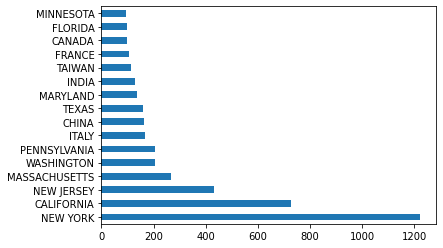

In [22]:
#plot most frequented values count
data['from'].value_counts()[:16].plot(kind='barh')

### Start to drop some features

#### drop irrelevant features that have reference to others.

**"field"** feature has reference to **"field_c"** feature so I dropped it.

In [23]:
#drop columns
data = data.drop(['field','career','pid','idg', 'zipcode','undergra'],axis=1)
#convert non-numerical columns to categorical datatype

#### drop highly correlated features

In [24]:
#REF: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop= [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [25]:
print(to_drop)
print(len(to_drop))
data.drop(to_drop, axis=1,inplace=True)

['race']
1


#### drop columns that have a lot of null values based on threshold

In [26]:
# I will remove features that is null values inside it is more than 70% in total.
threshold = len(df) * .7
data = data.dropna(thresh = threshold, axis = 1)
data.isnull().sum().sort_values()

gender               0
career_c             0
goal                 0
income               0
from                 0
tuition              0
mn_sat               0
field_cd             0
age                  0
race_o               0
age_o                0
age_difference       0
position             0
condtn               0
order                0
partner              0
wave                 0
round                0
samerace             1
reading             64
go_out              64
music               64
concerts            64
movies              64
sports              64
tvsports            64
exercise            64
dining              64
museums             64
theater             64
hiking              64
gaming              64
clubbing            64
tv                  64
art                 64
yoga                64
imprelig            64
intel1_1            64
sinc1_1             64
shopping            64
fun2_1              64
attr1_1             64
sinc2_1             64
attr2_1    

### convert data type of some features from object to integer since they all have numeric values

In [27]:
#convert their values to integer values
data[["age","age_o",'mn_sat','income']] = data[["age",'age_o','mn_sat','income']].astype(int)

### Convert some features to one hot encoded features even they were have numeric values.

In [28]:
#these fields doesn't represent integer values that can be comparable otherwise they are categorical data.
data[['gender','from','field_cd','career_c','goal','race_o','samerace','round','wave','position','order','condtn']] = data[['gender','from','field_cd','career_c','goal','race_o','samerace','round','wave','position','order','condtn']].astype('category')
print(f"the shape of the data before one hot encoding transfrom {data.shape}")
data = pd.get_dummies(data, columns = ['from','field_cd','career_c','goal','race_o','round','wave','position','order','condtn'],prefix=['from', 'field_cd', 'career_c', 'goal','race_o','round','wave','position','order','condtn'],drop_first=True)
print(f"now the shape of the data after one hot encoding transfrom is {data.shape}")

the shape of the data before one hot encoding transfrom (6904, 153)
now the shape of the data after one hot encoding transfrom is (6904, 388)


### Check how many data types now after we did some preprocessing process to our data we have in our dataset.

In [29]:
print(data.dtypes.value_counts())

uint8       245
float64     136
int64         5
category      1
category      1
dtype: int64


Convert some redundant data types

In [30]:
data[data.select_dtypes(['uint8','int64']).columns] = data.select_dtypes(['uint8','int64']).apply(lambda x: x.astype('int32'))
data.dtypes.value_counts()

int32       250
float64     136
category      1
category      1
dtype: int64

now we only have two numeric data types in the whole dataset.

split merged data to test and train dataset again to their origins

In [31]:
df = data.iloc[:df.shape[0],:]
y = df['match']
df = df.drop(['match'],axis=1)
df2 = data.iloc[df.shape[0]:,:]
df2 = df2.drop(['match'],axis=1)

## Handle implanced data

In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))
  

ROS = RandomOverSampler(random_state = 2)
df, y = ROS.fit_resample(df, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(df.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(df == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, counts of label '1': 728
Before OverSampling, counts of label '0': 3707 

After OverSampling, the shape of train_X: (7414, 387)
After OverSampling, the shape of train_y: (7414,) 

After OverSampling, counts of label '1': gender                                                             3794
positin1                                                            364
partner                                                             486
int_corr                                                              0
samerace                                                           2925
age_o                                                                 0
pf_o_att                                                              0
pf_o_sin                                                             24
pf_o_int                                                             29
pf_o_fun                                                             24
pf_o_amb                              

### select numeric features

In [33]:
features_numeric = list(df.select_dtypes(include=['int','float']))
features_numeric

['positin1',
 'partner',
 'int_corr',
 'age_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'mn_sat',
 'tuition',
 'imprace',
 'imprelig',
 'income',
 'date',
 'go_out',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',
 'attr',
 'sinc',
 'intel',
 'fun',
 'amb',
 'shar',
 'like',
 'prob',
 'met',
 'match_es',
 'attr1_s',
 'sinc1_s',
 'intel1_s',
 'fun1_s',
 'amb1_s',
 'sha

## Builing a Tunable Pipeline

A handsome way to set up ordered steps to do some operations on the data, like impute missing values in simple steps.

There are a lot of missing values in this dataset, we could handle some of them manually but there are 254 numeric features now after doing some preprocessing and most of them have null values so we want to deal with these columns

The absence of values maybe happened because of:

- an error in the machine/sensors
- error on part of the data entry
- accidental deletion of values
- forgetfulness to input values
- error in accounting, etc.

### Pipline with gradient boosting classifier

In [34]:
np.random.seed(0)

#we will call knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer() #A robust way to impute missing values by finding the nearest neighbors with the Euclidean distance matrix.

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters

transformer_numeric = Pipeline(
    steps=[
        ('imputer',imputer),
        ('scaler', StandardScaler())]
)


# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

#After many trials on kaggle I found that the best classifier worked for me was GradientBoostingClassifier().
gradient_boost_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', 
           GradientBoostingClassifier(),
        )
    ]
)
gradient_boost_pipline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['positin1', 'partner',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'l

### Pipline with random classifier

In [35]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

random_forest_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', 
           RandomForestClassifier(n_jobs=-1),
        )
    ]
)
random_forest_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['positin1', 'partner',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'l

### Pipline with logistic regression classifier

In [36]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

log_reg_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', 
           LogisticRegression(multi_class='ovr'),
        )
    ]
)
log_reg_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['positin1', 'partner',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 'fun_o', 'amb_o',
                                                   'shar_o', 'l

Now, we finished preprocessing process and building our three models also we have nothing to do with the data, also we build our pipline which have our machine learning model but we don't want train it before finiding the best hyperparameters combination

### Find some of hyperparameters combination for decision tree classifier

In [37]:
#search for the best decision tree's hyperparameters using two types of search (Random and bayesian search)

param_random_RF = {
    'classifier__n_estimators':[50,100,150,200],
    'classifier__max_depth':[3,4,5,10,15,20],
    'classifier__criterion':['gini','entropy'],
    'classifier__min_samples_split':[2,3,4,6,7,8]
}

#moderate
bayesian_search_RF  = BayesSearchCV(

    random_forest_pipline,
    {
    'classifier__n_estimators': Categorical([50,100,150,200]),
    'classifier__max_depth': Integer(3,15),
     'classifier__criterion':Categorical(['gini','entropy']),
     'classifier__min_samples_split':Integer(3,10)
    },
    
n_iter=2,
random_state=0,
verbose=3,
# we still use 
cv=4,
)

random_search_RF = RandomizedSearchCV(random_forest_pipline, param_random_RF, cv=4, verbose=3, n_jobs=-1, scoring='roc_auc')

### Find the best of hyperparameters combination for logistic regression classifier

In [38]:
param_grid_LG  = {
    #search space
    'classifier__C':[0.1,0.01,0.001,0.5], #learning rate
    'classifier__solver':['newton-cg','lbfgs','liblinear','sag'], #optimization technique
    'classifier__max_iter':[100,1000,10000] #max iteration to convergence
}


bayesian_search_LG = BayesSearchCV(
    #search space
    log_reg_pipline,
    {
     'classifier__C': Categorical([0.1,0.01,0.001,0.5,0.05]),
     'classifier__solver': Categorical(['newton-cg','lbfgs','liblinear','sag']),
     'classifier__max_iter':Categorical([100,1000,10000]),
    },
    
n_iter=2,
random_state=0,
verbose=3,
# we still use 
cv=4, #number of validation sets
)
grid_search_LG = GridSearchCV(log_reg_pipline, param_grid_LG, cv=4, verbose=3, n_jobs=-1, scoring='roc_auc')

### Find some of hyperparameters combination for gradient boosting classifier

In [39]:
#search for the best GradientBoostingClassifier's hyperparameters using three types of search (I explained what they are in the first cell)

#effient in time
param_random_GB = {
    #search space
    'classifier__learning_rate':[0.1,0.01,0.001,0.5,0.05], #learning rate
    'classifier__n_estimators':[50,100,150,200], #estimator help trees to avoid overfitting
    'classifier__max_depth':[3,4,5,10,15,20] #max depth of the tree
}

#moderate
bayesian_search_GB  = BayesSearchCV(

    gradient_boost_pipline,
    {
    'classifier__learning_rate': Real(1e-5, 0.1, prior='log-uniform'),
    'classifier__n_estimators': Categorical([50,100,150,200]),
    'classifier__max_depth': Integer(3,15)
    },
n_iter=2,
random_state=0,
verbose=3,
# we still use 
cv=4,
)
# cv=4 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs

random_search_GB = RandomizedSearchCV(gradient_boost_pipline, param_random_GB, cv=4, verbose=3, n_jobs=-1, scoring='roc_auc')

## Start training (Random forest classifier with random search)

In [ ]:
start_time = time.time()

#train model many times with different hyperparameters
random_search_RF.fit(df,y)

end_time = time.time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters for random forest classifier using random search  was: {result}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits


## First trial

In [ ]:
print(f'best score using random search classifier and random search method {random_search_RF.best_score_}') #score won't differ too much from bayesian search
print(f'best hyperparameters found using random search classifier and random search method {random_search_RF.best_params_}')
submission = pd.DataFrame()

submission['id'] = df2.index

submission['match'] = random_search_RF.predict_proba(df2)[:,1]

submission.to_csv('submission random search RF.csv', index=False)
submission['match']
print(random_search_RF.predict_proba(df2)[:,1])

## Start training (Random forest classifier with bayesian search)

better than previous one in finding better hyperparameters.

In [ ]:
start_time = time.time()

#train model many times with different hyperparameters
bayesian_search_RF.fit(df,y)

end_time = time.time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters for random forest classifier using bayesian search  was: {result}")

## Second trial

In [ ]:
print(f'best score using random search classifier and bayesian search method {bayesian_search_RF.best_score_}')#score won't differ too much from random search, roc_auc 87.6565%
print(f'best hyperparameters found using random search classifier and bayesian search method {bayesian_search_RF.best_params_}')
submission = pd.DataFrame()

submission['id'] = df2.index

submission['match'] = bayesian_search_RF.predict_proba(df2)[:,1]

submission.to_csv('submission bayesian search RF.csv', index=False)
submission['match']
print(bayesian_search_RF.predict_proba(df2)[:,1])

## Start training (Logistic regression classifier with bayesian search)

In [ ]:
start_time = time.time()

#train model many times with different hyperparameters
bayesian_search_LG.fit(df,y)

end_time = time.time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters for logistic regression classifier using bayesian search  was: {result}")

## Third trial

In [ ]:
print(f'best score using logistic regression with bayesian search  is {bayesian_search_LG.best_score_}.') #good result to its execution time
print(f'best hyperparameters found using logistic regression with bayesian search are {bayesian_search_LG.best_params_} \n')

submission = pd.DataFrame()

submission['id'] = df2.index

submission['match'] = bayesian_search_LG.predict_proba(df2)[:,1]

submission.to_csv('submission bayesian search LG.csv', index=False)
submission['match']
print(bayesian_search_LG.predict_proba(df2)[:,1])

## Start training (Logistic regression classifier with grid search to find best hyperparameters combination from the values that you gave it to it)

In [ ]:
start_time = time.time()

#train model many times with different hyperparameters
grid_search_LG.fit(df,y)

end_time = time.time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters for logistic regression classifier using grid search  was: {result}")

## Fourth trial

In [ ]:
print(f'best score using logistic regression with grid search  is {grid_search_LG.best_score_}.') #I won't run it again because of the huge running time, roc_auc score on kaggle 86.31%
print(f'best hyperparameters found using logistic regression with grid search are {grid_search_LG.best_params_} \n')

submission = pd.DataFrame()

submission['id'] = df2.index

submission['match'] = grid_search_LG.predict_proba(df2)[:,1]

submission.to_csv('submission grid search LG.csv', index=False)
submission['match']
print(grid_search_LG.predict_proba(df2)[:,1])

## Start training :(gradient boosting classifier with random search)

In [ ]:
start_time = time.time()

#train model many times with different hyperparameters
random_search_GB.fit(df,y)

end_time = time.time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters for gradient boosting classifier using random search  was: {result}")

## Fifth trial

In [ ]:
print(f'best score using gradient boosting with random search  is {random_search_GB.best_score_}.') #best roc_auc result on kaggle 88.5432% 
print(f'best hyperparameters found using gradient boosting with random search are {random_search_GB.best_params_} \n')
submission = pd.DataFrame()

submission['id'] = df2.index

submission['match'] = random_search_GB.predict_proba(df2)[:,1]

submission.to_csv('submission random search GB.csv', index=False)
submission['match']
print(random_search_GB.predict_proba(df2)[:,1])

## Start training:(gradient boosting classifier with bayesian search)

better than previous one in finding better hyperparameters but it will take more time than random search.

In [ ]:
start_time = time.time()

#train model many times with different hyperparameters
bayesian_search_GB.fit(df,y)

end_time = time.time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters for gradient boosting classifier using bayesian search  was: {result}")

## Last trial

In [ ]:
print(f'best score using gradient boosting with bayesian search  is {bayesian_search_GB.best_score_}.') #roc_auc score on kaggle 86.435%
print(f'best hyperparameters found using gradient boosting with bayesian search are {bayesian_search_GB.best_params_} \n')
submission = pd.DataFrame()

submission['id'] = df2.index

submission['match'] = bayesian_search_GB.predict_proba(df2)[:,1]

submission.to_csv('submission bayesian search GB.csv', index=False)
submission['match']
print(bayesian_search_GB.predict_proba(df2)[:,1])